**Lineer Regression**

https://mlu-explain.github.io/linear-regression/

Eğim (katsayı): [2.77011339]
Kesişim (sabit): [4.21509616]
Ortalama Kare Hata (MSE): 0.8065845639670531


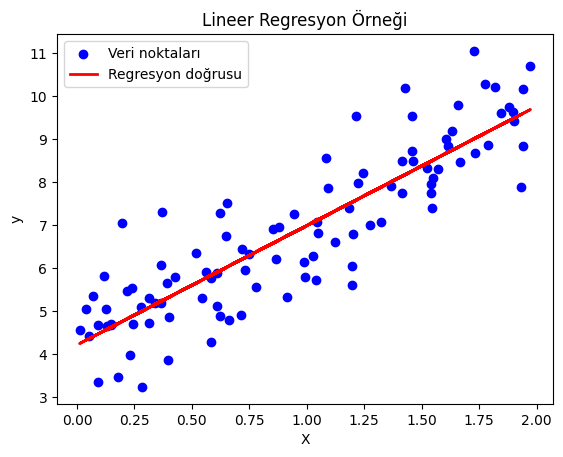

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Rastgele veri seti oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Bağımsız değişken
y = 4 + 3 * X + np.random.randn(100, 1)  # Bağımlı değişken (gürültü eklenmiş)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Modelin katsayıları (eğim ve kesişim)
print("Eğim (katsayı):", model.coef_[0])
print("Kesişim (sabit):", model.intercept_)

# Tahmin yapma
y_pred = model.predict(X)

# Ortalama Kare Hata (MSE) hesaplama
mse = mean_squared_error(y, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

# Veriyi ve regresyon doğrusunu görselleştirme
plt.scatter(X, y, color='blue', label='Veri noktaları')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresyon doğrusu')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineer Regresyon Örneği')
plt.legend()
plt.savefig('linear_regression_plot.png')

 **Gradient Descent**

Başlangıç x: 4.0
Son x: 3.2331251098590505e-11
Son kayıp fonksiyonu değeri (f(x)): 1.0453097976001098e-21


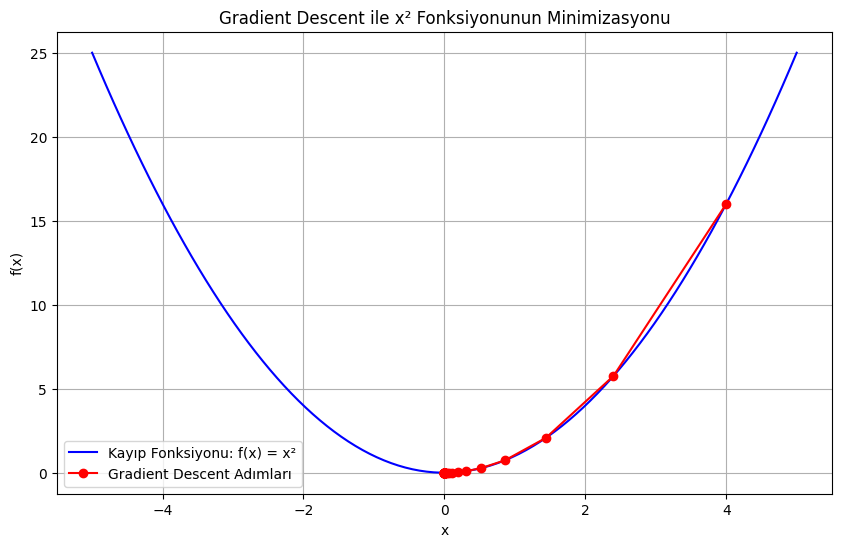

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kayıp fonksiyonu: f(x) = x^2
def loss_function(x):
    return x**2

# Kayıp fonksiyonunun türevi (gradyan): f'(x) = 2x
def gradient(x):
    return 2 * x

# Gradient Descent parametreleri
learning_rate = 0.2  # Öğrenme oranı
n_iterations = 50    # İterasyon sayısı
x_initial = 4.0      # Başlangıç noktası

# Gradient Descent
x = x_initial
x_history = [x]  # x değerlerini kaydetmek için liste

for i in range(n_iterations):
    grad = gradient(x)  # Gradyanı hesapla
    x = x - learning_rate * grad  # x'i güncelle
    x_history.append(x)  # Yeni x'i kaydet

# Sonuçları yazdırma
print("Başlangıç x:", x_initial)
print("Son x:", x)
print("Son kayıp fonksiyonu değeri (f(x)):", loss_function(x))

# Görselleştirme
x_range = np.linspace(-5, 5, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, 'b-', label='Kayıp Fonksiyonu: f(x) = x²')
plt.plot(x_history, [loss_function(x) for x in x_history], 'ro-', label='Gradient Descent Adımları')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent ile x² Fonksiyonunun Minimizasyonu')
plt.legend()
plt.grid(True)
plt.savefig('gradient_descent_non_linear_plot.png')

**Logistic Regression**

Doğruluk Skoru: 1.0
Karışıklık Matrisi:
 [[13  0]
 [ 0  7]]


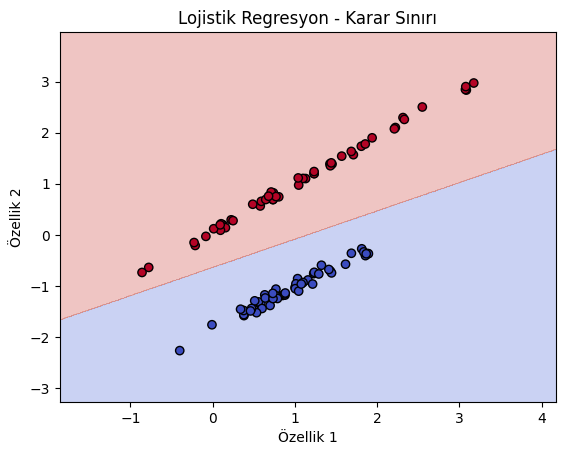

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sentetik veri seti oluşturma
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturma ve eğitme
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Lojistik Regresyon - Karar Sınırı')
plt.savefig('logistic_regression_plot.png')

**Naive Bayes**

Doğruluk Skoru: 0.6666666666666666
Karışıklık Matrisi:
 [[1 1]
 [0 1]]

Yeni E-posta Tahminleri:
E-posta: click to win free prize -> Spam
E-posta: team meeting at 2pm -> Ham


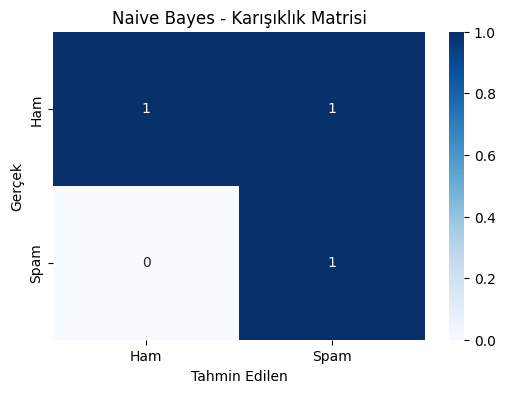

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sentetik e-posta veri seti oluşturma
emails = [
    "win free money now click here",
    "hello friend how are you",
    "claim your prize today urgent",
    "meeting tomorrow at 10am",
    "discount offer buy now cheap",
    "project update please review",
    "free gift card click to win",
    "lunch plan today with team",
    "limited time offer act now",
    "happy birthday wish you best"
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1: Spam, 0: Ham

# Veriyi DataFrame'e dönüştürme
data = pd.DataFrame({'email': emails, 'label': labels})

# Metin verisini sayısal özelliklere dönüştürme
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['email'])
y = data['label']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
model = MultinomialNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Naive Bayes - Karışıklık Matrisi')
plt.savefig('naive_bayes_confusion_matrix.png')

# Yeni e-posta testi
new_emails = ["click to win free prize", "team meeting at 2pm"]
new_emails_transformed = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_transformed)
print("\nYeni E-posta Tahminleri:")
for email, pred in zip(new_emails, predictions):
    print(f"E-posta: {email} -> {'Spam' if pred == 1 else 'Ham'}")

**Knn(K-nearest Neighbors)**

Doğruluk Skoru: 0.7555555555555555
Karışıklık Matrisi:
 [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Yeni Veri Noktası Tahminleri:
Veri: [5. 3.] -> setosa
Veri: [6.  2.5] -> versicolor


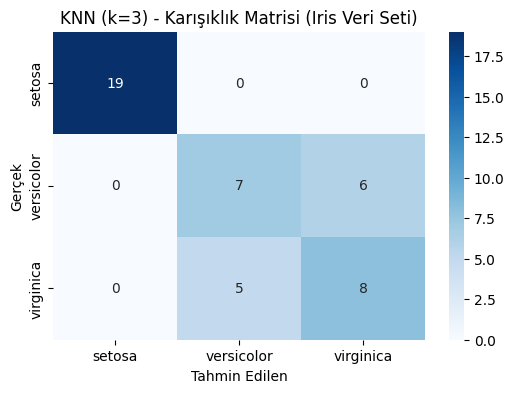

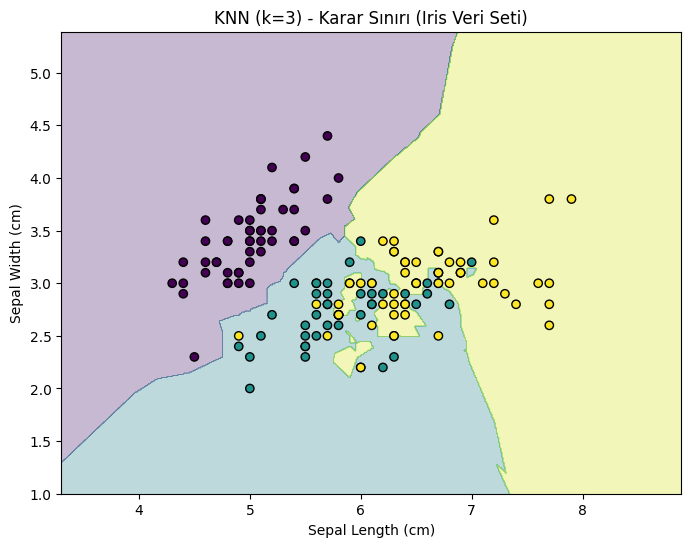

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Iris veri setini yükleme
iris = load_iris()
X = iris.data[:, :2]  # İlk iki özelliği (sepal length, sepal width) kullan
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma ve eğitme
k = 3  # Komşu sayısı
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title(f'KNN (k={k}) - Karışıklık Matrisi (Iris Veri Seti)')
plt.savefig('knn_iris_confusion_matrix.png')

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'KNN (k={k}) - Karar Sınırı (Iris Veri Seti)')
plt.savefig('knn_iris_decision_boundary.png')

# Yeni veri noktası testi
new_data = np.array([[5.0, 3.0], [6.0, 2.5]])  # Örnek yeni veri noktaları
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for data, pred in zip(new_data, new_predictions):
    print(f"Veri: {data} -> {iris.target_names[pred]}")

**Support Vector Machine (SVM)**

Doğruluk Skoru: 0.85
Karışıklık Matrisi:
 [[27  7]
 [ 2 24]]

Yeni Veri Noktası Tahminleri:
Veri: [0. 0.] -> Riskli
Veri: [1.5 1.5] -> Risksiz


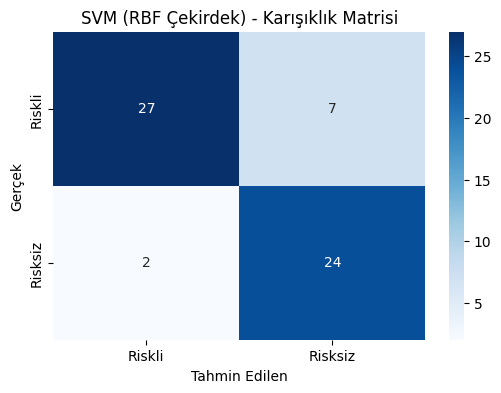

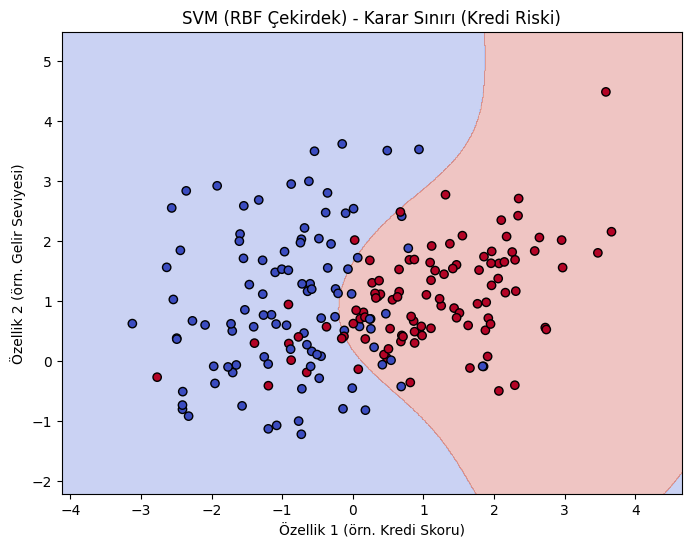

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Sentetik veri seti oluşturma (kredi riski tahmini: risksiz=1, riskli=0)
np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM modelini oluşturma ve eğitme
model = SVC(kernel='rbf', C=1.0, random_state=42)  # RBF çekirdeği kullanıyoruz
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Riskli', 'Risksiz'], yticklabels=['Riskli', 'Risksiz'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('SVM (RBF Çekirdek) - Karışıklık Matrisi')
plt.savefig('svm_credit_risk_confusion_matrix.png')

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Özellik 1 (örn. Kredi Skoru)')
plt.ylabel('Özellik 2 (örn. Gelir Seviyesi)')
plt.title('SVM (RBF Çekirdek) - Karar Sınırı (Kredi Riski)')
plt.savefig('svm_credit_risk_decision_boundary.png')

# Yeni veri noktası testi
new_data = np.array([[0, 0], [1.5, 1.5]])  # Örnek yeni veri noktaları
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for data, pred in zip(new_data, new_predictions):
    print(f"Veri: {data} -> {'Risksiz' if pred == 1 else 'Riskli'}")

**Random Forest**


Doğruluk Skoru: 0.3333333333333333
Karışıklık Matrisi:
 [[23 23 45]
 [21 21 43]
 [40 28 56]]

Yeni Veri Noktası Tahminleri:
Veri: {'temperature': 25.0, 'humidity': 60.0, 'wind_speed': 10.0} -> Sunny
Veri: {'temperature': 15.0, 'humidity': 90.0, 'wind_speed': 20.0} -> Sunny


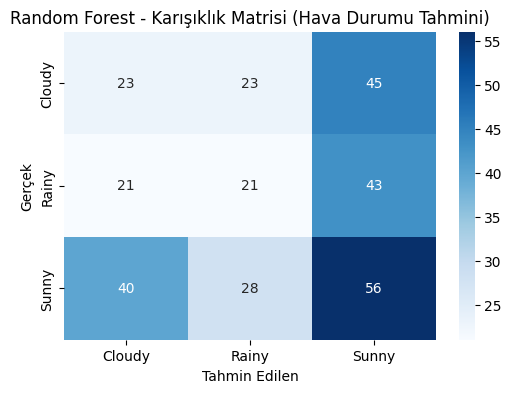

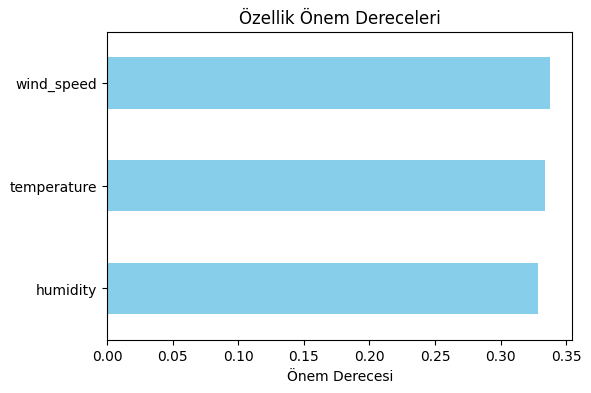

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Sentetik hava durumu veri seti oluşturma
np.random.seed(42)
n_samples = 1000
data = {
    'temperature': np.random.uniform(0, 40, n_samples),  # Sıcaklık (°C)
    'humidity': np.random.uniform(20, 100, n_samples),  # Nem (%)
    'wind_speed': np.random.uniform(0, 30, n_samples),  # Rüzgar hızı (km/s)
    'weather': np.random.choice(['Sunny', 'Cloudy', 'Rainy'], n_samples, p=[0.4, 0.3, 0.3])
}
df = pd.DataFrame(data)

# Kategorik hedef değişkeni sayısala çevirme
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

# Özellikler ve hedef değişken
X = df[['temperature', 'humidity', 'wind_speed']]
y = df['weather']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modelini oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Random Forest - Karışıklık Matrisi (Hava Durumu Tahmini)')
plt.savefig('random_forest_weather_confusion_matrix.png')

# Özellik önem derecelerini görselleştirme
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Önem Derecesi')
plt.title('Özellik Önem Dereceleri')
plt.savefig('random_forest_weather_feature_importance.png')

# Yeni veri noktası testi
new_data = pd.DataFrame({
    'temperature': [25.0, 15.0],
    'humidity': [60.0, 90.0],
    'wind_speed': [10.0, 20.0]
})
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for i, pred in enumerate(new_predictions):
    print(f"Veri: {new_data.iloc[i].to_dict()} -> {le.inverse_transform([pred])[0]}")

Ortalama Kare Hata (MSE): 880480947.185902
R² Skoru: 0.9621441306073966
Eğitim Süresi (saniye): 2.4099152088165283

Yeni Veri Noktası Tahminleri:
Veri: {'house_size': 150.0, 'bedrooms': 3.0, 'neighborhood_quality': 7.0, 'age': 10.0} -> Tahmin Edilen Fiyat: $420920.41
Veri: {'house_size': 200.0, 'bedrooms': 4.0, 'neighborhood_quality': 5.0, 'age': 20.0} -> Tahmin Edilen Fiyat: $506362.28


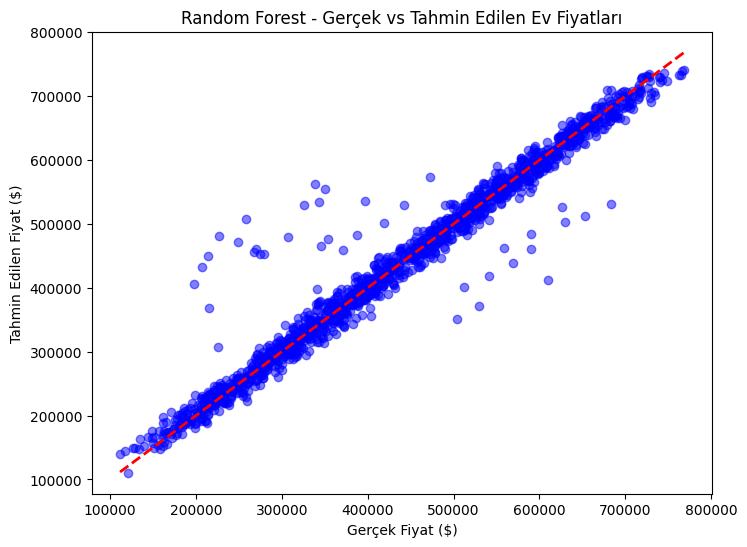

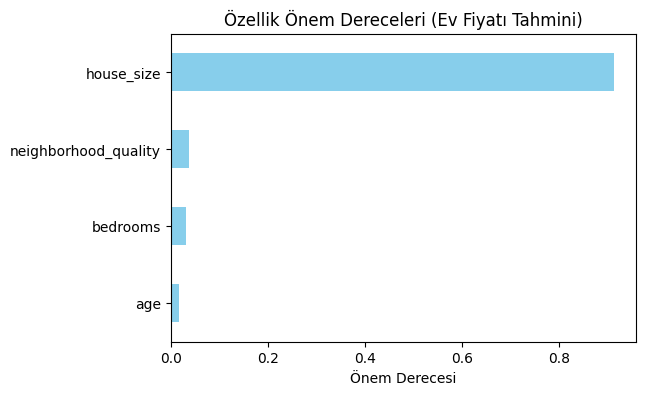

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

# Sentetik ev fiyatı veri seti oluşturma
np.random.seed(42)
n_samples = 5000  # 5.000 örnek
data = {
    'house_size': np.random.uniform(50, 300, n_samples),       # Ev büyüklüğü (m²)
    'bedrooms': np.random.randint(1, 6, n_samples),           # Yatak odası sayısı
    'neighborhood_quality': np.random.uniform(1, 10, n_samples),  # Mahalle kalitesi (1-10)
    'age': np.random.uniform(0, 50, n_samples),              # Ev yaşı (yıl)
    'price': np.zeros(n_samples)                             # Hedef: Ev fiyatı ($)
}

# Fiyatları simüle etme (basit bir formül + gürültü)
df = pd.DataFrame(data)
df['price'] = (df['house_size'] * 2000 + df['bedrooms'] * 20000 + df['neighborhood_quality'] * 10000 - df['age'] * 1000 +
               np.random.normal(0, 10000, n_samples))

# Eksik veri simülasyonu (gerçekçi bir senaryo için)
df.loc[np.random.choice(df.index, size=int(0.03 * n_samples)), 'house_size'] = np.nan

# Özellikler ve hedef değişken
X = df[['house_size', 'bedrooms', 'neighborhood_quality', 'age']]
y = df['price']

# Özellik ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Regressor modelini oluşturma ve eğitme
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Değerlendirme metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("R² Skoru:", r2)
print("Eğitim Süresi (saniye):", training_time)

# Gerçek ve tahmin edilen fiyatların görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Fiyat ($)')
plt.ylabel('Tahmin Edilen Fiyat ($)')
plt.title('Random Forest - Gerçek vs Tahmin Edilen Ev Fiyatları')
plt.savefig('random_forest_house_price_scatter.png')

# Özellik önem derecelerini görselleştirme
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Önem Derecesi')
plt.title('Özellik Önem Dereceleri (Ev Fiyatı Tahmini)')
plt.savefig('random_forest_house_price_feature_importance.png')

# Yeni veri noktası testi
new_data = pd.DataFrame({
    'house_size': [150.0, 200.0],
    'bedrooms': [3, 4],
    'neighborhood_quality': [7.0, 5.0],
    'age': [10.0, 20.0]
})
new_data_scaled = scaler.transform(new_data)
new_predictions = model.predict(new_data_scaled)
print("\nYeni Veri Noktası Tahminleri:")
for i, pred in enumerate(new_predictions):
    print(f"Veri: {new_data.iloc[i].to_dict()} -> Tahmin Edilen Fiyat: ${pred:.2f}")

**Kümeleme**

**Centroid/K-means**

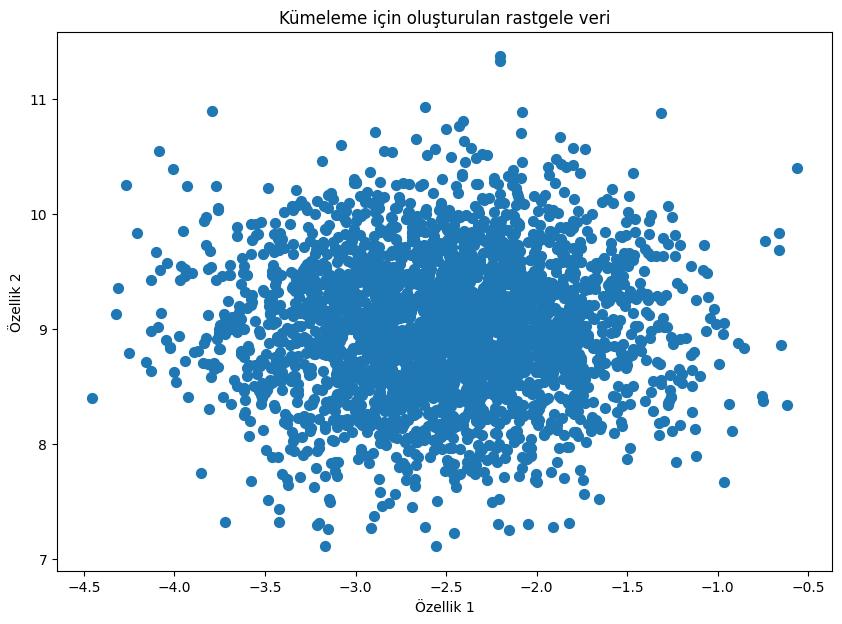

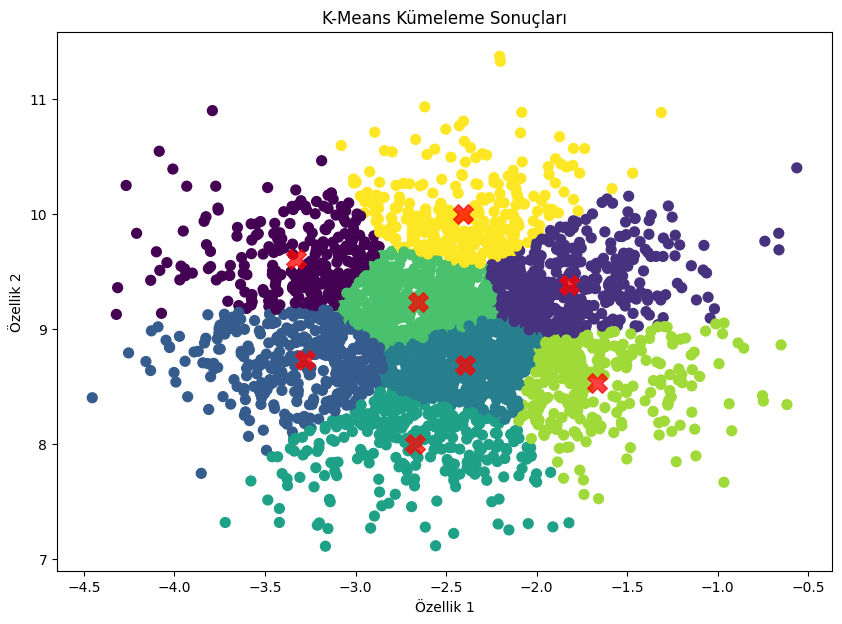

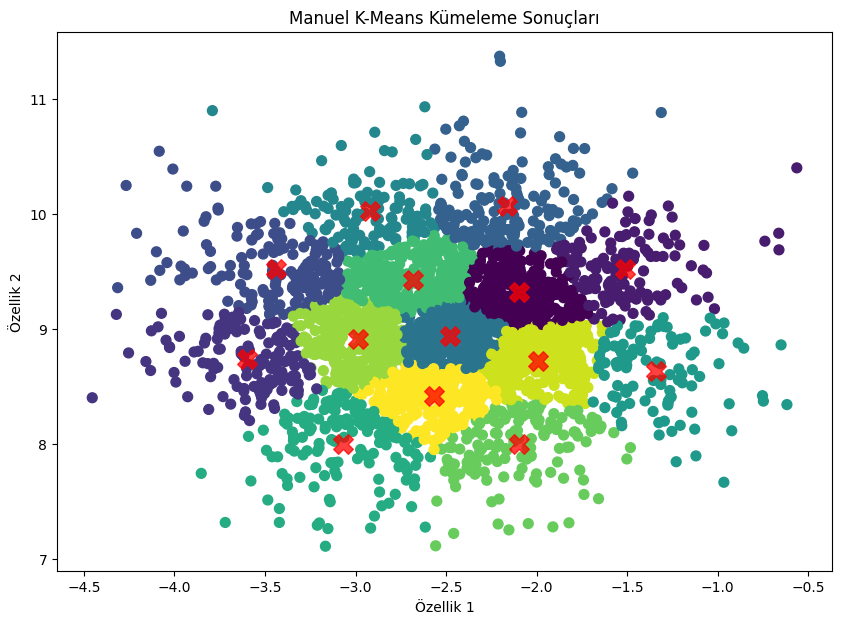

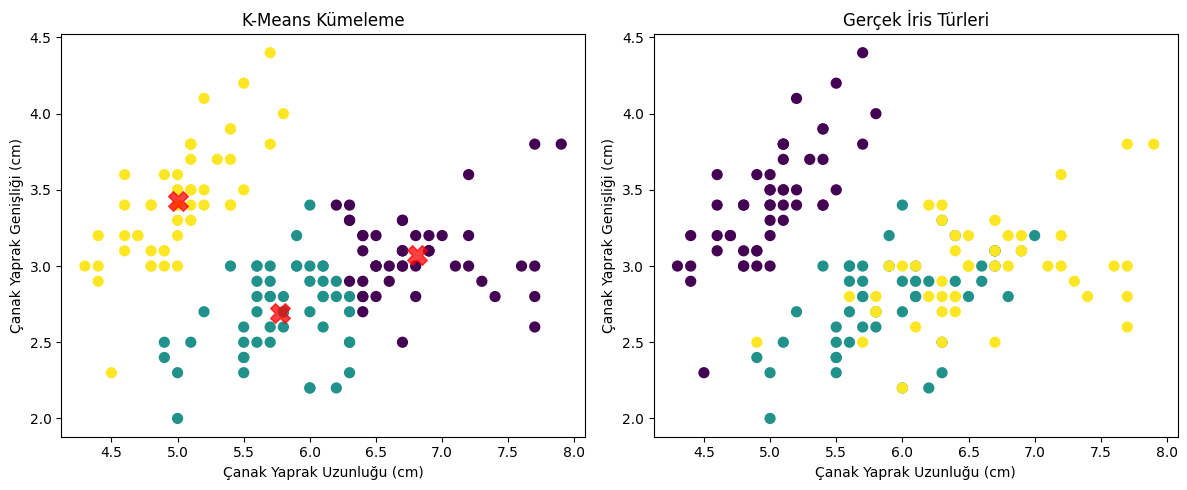

Kümeleme Analizi Tamamlandı!


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Rastgele veri oluştur
X, y_true = make_blobs(
    n_samples=3000,
    centers=1,
    cluster_std=0.60,
    random_state=42
)

# Veri noktalarını görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Kümeleme için oluşturulan rastgele veri")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# K-Means modelini oluştur ve eğit
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans.fit(X)

# Küme merkezlerini ve etiketleri al
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Sonuçları görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Kümeleme Sonuçları")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# Manuel K-Means algoritması uygulaması
def euclidean_distance(a, b):
    """İki nokta arasındaki Öklid mesafesini hesaplar"""
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans_manual(X, k=14, max_iters=100):
    """
    Manuel K-Means algoritması

    Parametreler:
    X: Veri noktaları
    k: Küme sayısı
    max_iters: Maksimum iterasyon sayısı

    Dönüş:
    labels: Her veri noktasının küme etiketi
    centroids: Küme merkezleri
    """
    # Rastgele k merkez seç
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]

    # Maksimum iterasyon sayısı kadar döngü
    for _ in range(max_iters):
        # Her noktanın en yakın merkezini bul
        clusters = [[] for _ in range(k)]
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)

        # Merkez pozisyonlarını güncelle
        old_centroids = centroids.copy()
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(X[clusters[i]], axis=0)

        # Merkezler değişmediyse dur
        if np.all(old_centroids == centroids):
            break

    # Noktaları kümelerine göre etiketle
    labels = np.zeros(len(X), dtype=int)
    for i in range(k):
        for idx in clusters[i]:
            labels[idx] = i

    return labels, centroids

# Manuel K-Means algoritmasını çalıştır
manual_labels, manual_centers = kmeans_manual(X)

# Manuel K-Means sonuçlarını görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=manual_labels, s=50, cmap='viridis')
plt.scatter(manual_centers[:, 0], manual_centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Manuel K-Means Kümeleme Sonuçları")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# Gerçek veriler üzerinde örnek: İris veri seti
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# İris veri setinde 2 boyuta indirgeme (basitlik için)
X_iris_2d = X_iris[:, :2]  # Sadece ilk iki özelliği al

# K-Means modelini oluştur ve eğit
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris.fit(X_iris_2d)

# Küme merkezlerini ve etiketleri al
y_kmeans_iris = kmeans_iris.predict(X_iris_2d)
centers_iris = kmeans_iris.cluster_centers_

# Sonuçları görselleştir
plt.figure(figsize=(12, 5))

# Sol taraf: K-Means kümeleme sonuçları
plt.subplot(1, 2, 1)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_kmeans_iris, s=50, cmap='viridis')
plt.scatter(centers_iris[:, 0], centers_iris[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Kümeleme")
plt.xlabel("Çanak Yaprak Uzunluğu (cm)")
plt.ylabel("Çanak Yaprak Genişliği (cm)")

# Sağ taraf: Gerçek sınıf etiketleri
plt.subplot(1, 2, 2)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, s=50, cmap='viridis')
plt.title("Gerçek İris Türleri")
plt.xlabel("Çanak Yaprak Uzunluğu (cm)")
plt.ylabel("Çanak Yaprak Genişliği (cm)")

plt.tight_layout()
plt.show()

print("Kümeleme Analizi Tamamlandı!")

**DBSCAN**

<Figure size 2000x2000 with 0 Axes>

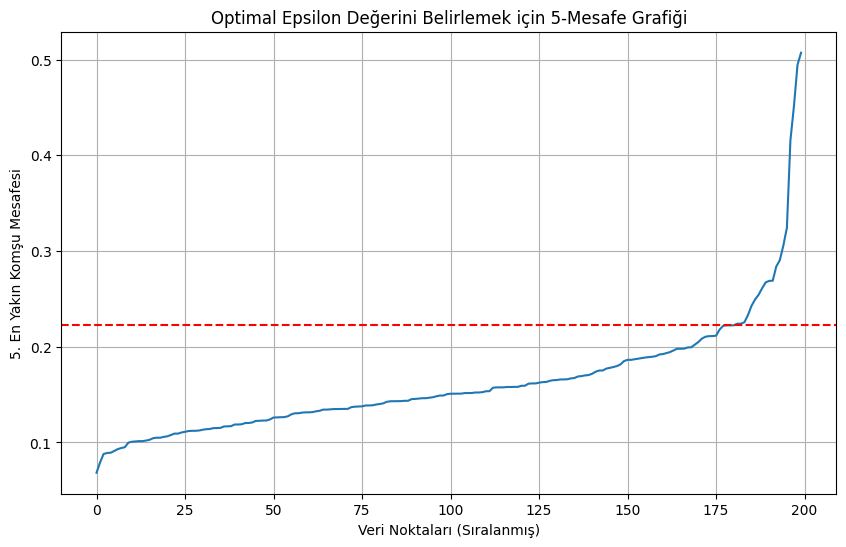

Önerilen Epsilon değeri: 0.222


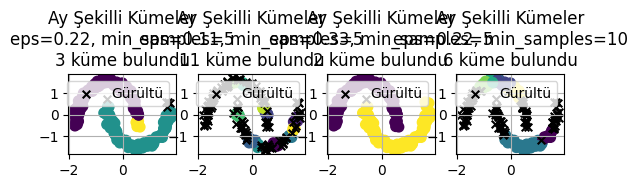

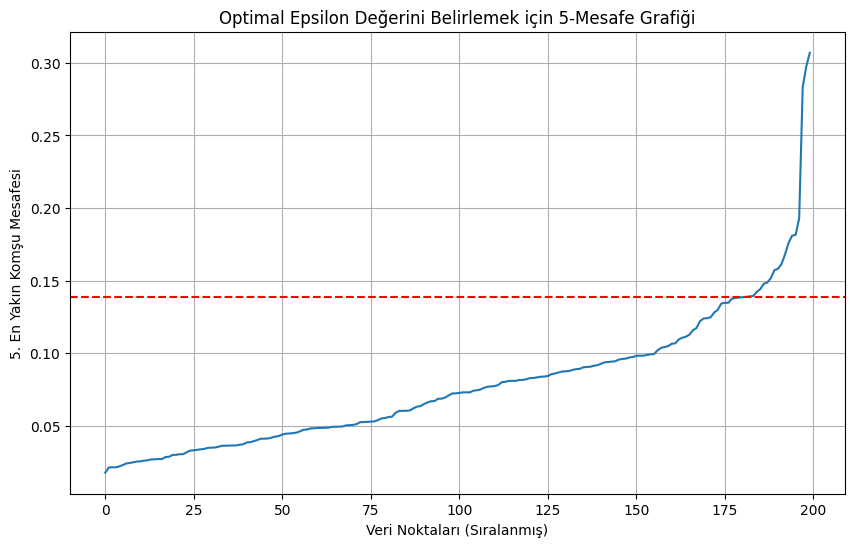

Önerilen Epsilon değeri: 0.139


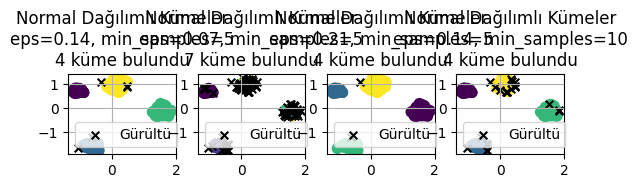

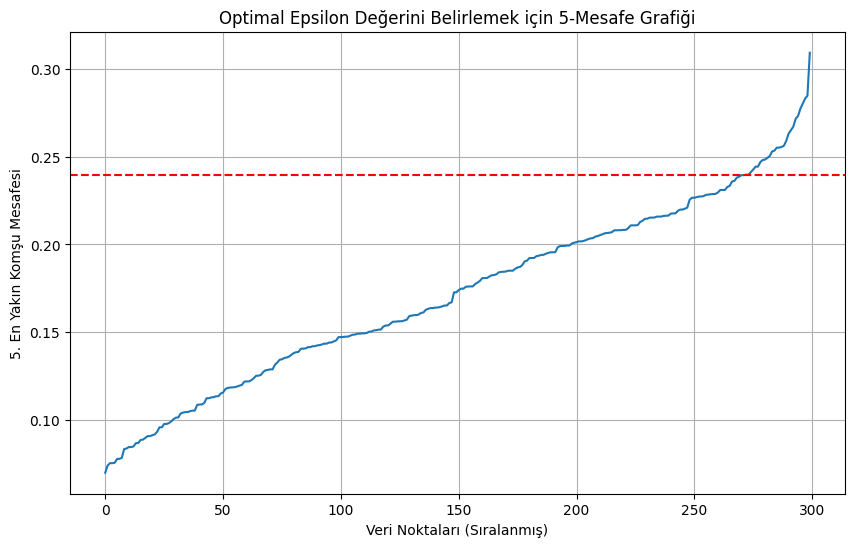

Önerilen Epsilon değeri: 0.240


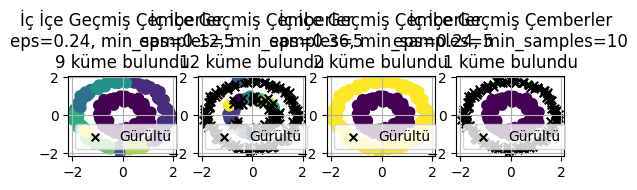

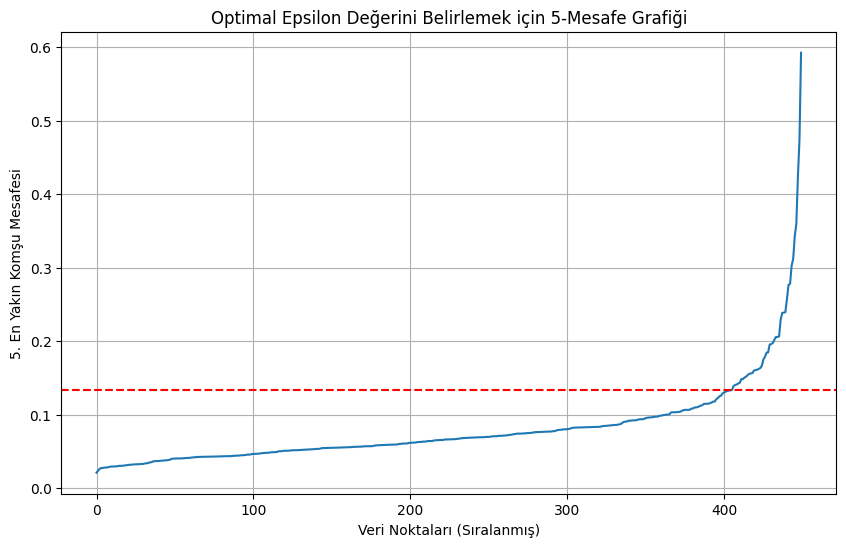

Önerilen Epsilon değeri: 0.134


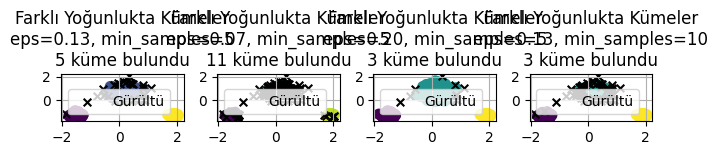

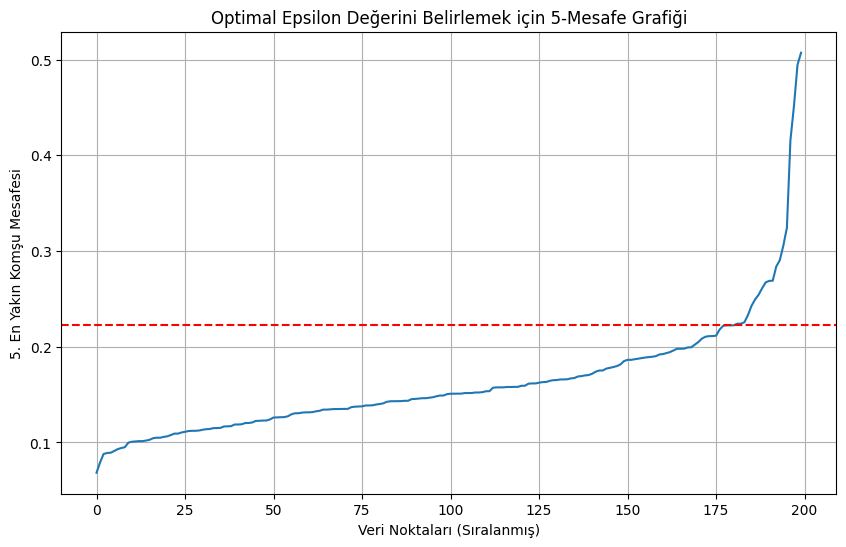

Önerilen Epsilon değeri: 0.222


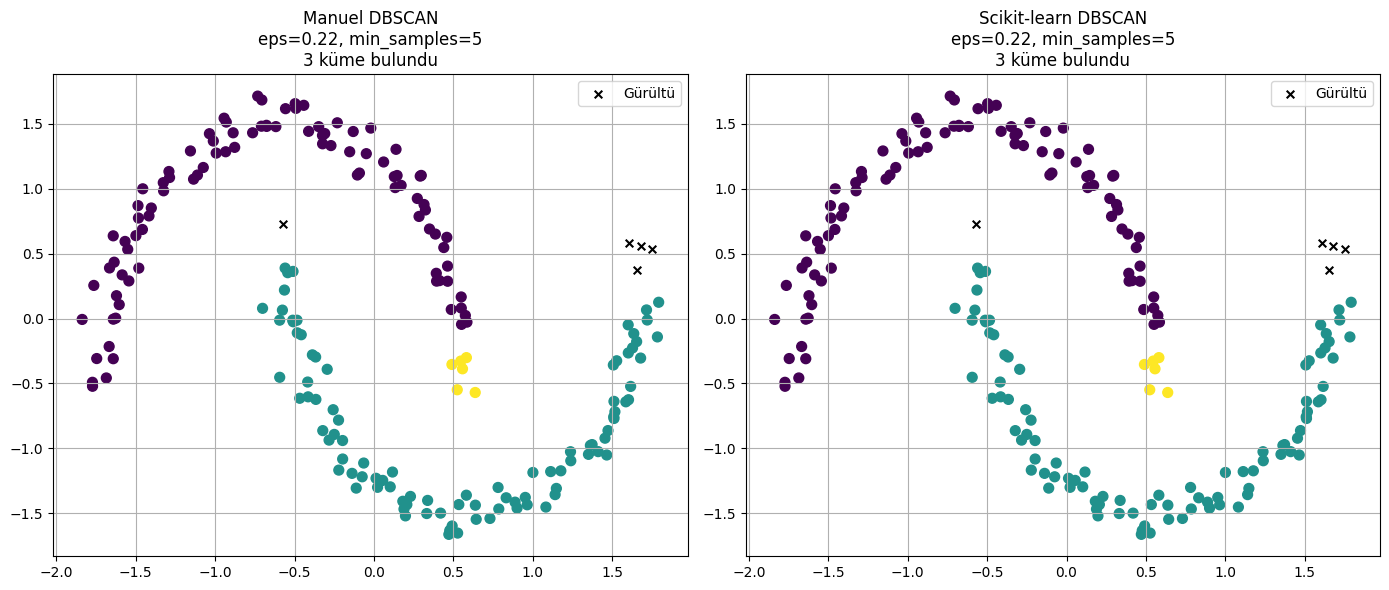

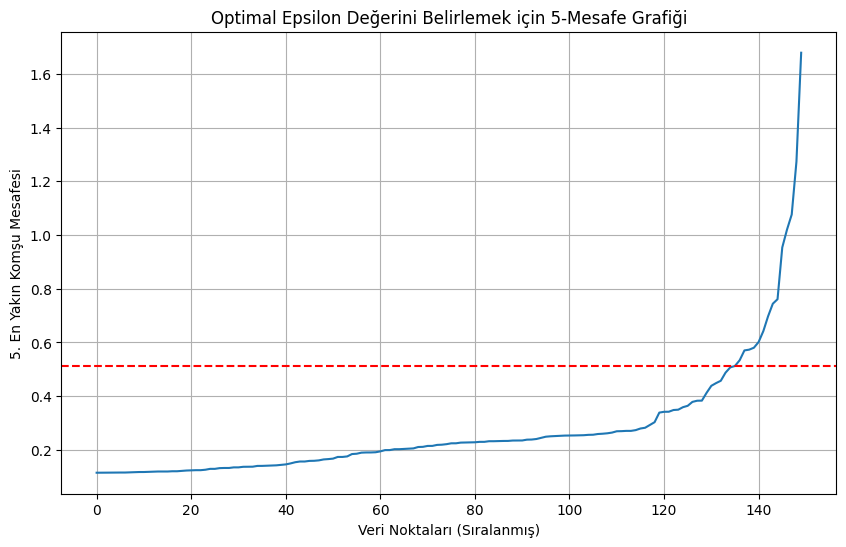

Önerilen Epsilon değeri: 0.513


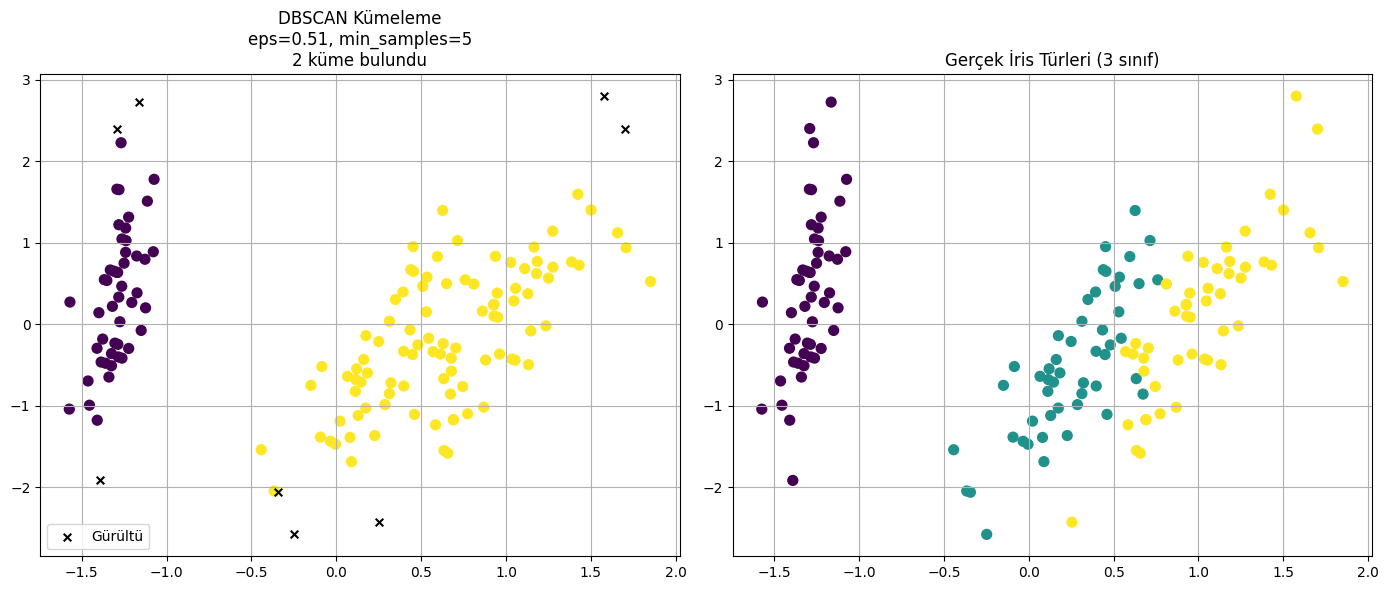

DBSCAN Kümeleme Analizi Tamamlandı!


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Farklı veri setleri oluşturalım
# 1. Half-moons (ay şekli) veri seti
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# 2. Blobs (normal dağılımlı kümeler) veri seti
X_blobs, y_blobs = make_blobs(n_samples=200, centers=4, cluster_std=[1.0, 0.8, 0.6, 0.4],
                             random_state=42)

# 3. İç içe geçmiş çemberler veri seti
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# 4. Farklı yoğunluktaki kümeler
X1, y1 = make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=0.3, random_state=42)
X2, y2 = make_blobs(n_samples=300, centers=[[4, 4]], cluster_std=0.7, random_state=42)
X3, y3 = make_blobs(n_samples=50, centers=[[8, 0]], cluster_std=0.2, random_state=42)

X_mixed = np.vstack([X1, X2, X3])
y_mixed = np.hstack([y1, y2+1, y3+2])

# Hepsini bir listeye koyalım
datasets = [
    (X_moons, "Ay Şekilli Kümeler"),
    (X_blobs, "Normal Dağılımlı Kümeler"),
    (X_circles, "İç İçe Geçmiş Çemberler"),
    (X_mixed, "Farklı Yoğunlukta Kümeler")
]

# DBSCAN için optimal parametreleri bulma fonksiyonu
def find_optimal_eps(X, k=5):
    # k-en yakın komşu mesafelerini hesapla
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, indices = neigh.kneighbors(X)

    # Her nokta için k. en yakın komşusuna olan mesafeyi al
    k_dist = np.sort(distances[:, k-1])

    # k-mesafe grafiği
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(X)), k_dist)
    plt.axhline(y=k_dist[int(len(k_dist)*0.9)], color='r', linestyle='--')
    plt.grid(True)
    plt.xlabel("Veri Noktaları (Sıralanmış)")
    plt.ylabel(f"{k}. En Yakın Komşu Mesafesi")
    plt.title(f"Optimal Epsilon Değerini Belirlemek için {k}-Mesafe Grafiği")
    plt.show()

    # "Dirsek" noktasını yaklaşık olarak belirle
    # Burada basit bir yaklaşım kullanıyoruz
    eps_suggestion = k_dist[int(len(k_dist)*0.9)]
    print(f"Önerilen Epsilon değeri: {eps_suggestion:.3f}")

    return eps_suggestion

# Tüm veri setlerini görselleştir ve DBSCAN uygula
plt.figure(figsize=(20, 20))
plot_num = 1

for X, name in datasets:
    # Veriyi ölçeklendir
    X_scaled = StandardScaler().fit_transform(X)

    # Optimal eps parametresini bul
    optimal_eps = find_optimal_eps(X_scaled)

    # Farklı parametrelerle DBSCAN uygula
    params = [
        {'eps': optimal_eps, 'min_samples': 5},
        {'eps': optimal_eps * 0.5, 'min_samples': 5},
        {'eps': optimal_eps * 1.5, 'min_samples': 5},
        {'eps': optimal_eps, 'min_samples': 10}
    ]

    for i, param in enumerate(params):
        # DBSCAN modelini oluştur ve uygula
        db = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
        labels = db.fit_predict(X_scaled)

        # Gürültü noktaları (-1)
        noise_points = (labels == -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Sonuçları görselleştir
        plt.subplot(len(datasets), 4, plot_num)
        plt.scatter(X_scaled[~noise_points, 0], X_scaled[~noise_points, 1],
                    c=labels[~noise_points], cmap='viridis', s=50)
        plt.scatter(X_scaled[noise_points, 0], X_scaled[noise_points, 1],
                    color='black', marker='x', s=30, label='Gürültü')
        plt.title(f"{name}\neps={param['eps']:.2f}, min_samples={param['min_samples']}\n{n_clusters} küme bulundu")
        plt.legend()
        plt.grid(True)

        plot_num += 1

plt.tight_layout()
plt.show()

# Manuel DBSCAN uygulaması
def dbscan_manual(X, eps=0.5, min_samples=5):
    """
    Manuel DBSCAN algoritması uygulaması

    Parametreler:
    X: Kümelenecek veri noktaları
    eps: İki noktanın komşu sayılması için maksimum mesafe
    min_samples: Çekirdek nokta sayılması için gereken minimum komşu sayısı

    Dönüş:
    labels: Her noktanın küme etiketi (-1: gürültü)
    """
    # Nokta sayısı
    n_points = X.shape[0]

    # Etiketleri başlat (-1: işlenmemiş)
    labels = np.ones(n_points, dtype=int) * -1

    # Küme sayacı
    cluster_id = 0

    # Her nokta için
    for point_id in range(n_points):
        # Bu nokta zaten işlendiyse atla
        if labels[point_id] != -1:
            continue

        # Nokta komşularını bul
        neighbors = []
        for i in range(n_points):
            if np.sqrt(np.sum((X[point_id] - X[i]) ** 2)) < eps:
                neighbors.append(i)

        # Eğer nokta yeterli komşuya sahip değilse, gürültü olarak işaretle
        if len(neighbors) < min_samples:
            labels[point_id] = -1
            continue

        # Yeni küme başlat
        cluster_id += 1
        labels[point_id] = cluster_id

        # Komşuları işle
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]

            # Gürültü noktasıysa, kümeye ekle
            if labels[neighbor] == -1:
                labels[neighbor] = cluster_id

                # Bu komşunun komşularını bul
                neighbor_neighbors = []
                for j in range(n_points):
                    if np.sqrt(np.sum((X[neighbor] - X[j]) ** 2)) < eps:
                        neighbor_neighbors.append(j)

                # Eğer bu komşu çekirdek noktaysa, onun komşularını da kuyrukla
                if len(neighbor_neighbors) >= min_samples:
                    neighbors.extend([n for n in neighbor_neighbors if n not in neighbors])

            i += 1

    return labels

# Manuel DBSCAN'i bir veri seti üzerinde deneyelim
X_selected = X_moons
X_scaled_selected = StandardScaler().fit_transform(X_selected)

# Uygun epsilon değeri bul
eps_selected = find_optimal_eps(X_scaled_selected)

# Manuel DBSCAN uygula
manual_labels = dbscan_manual(X_scaled_selected, eps=eps_selected, min_samples=5)

# Scikit-learn DBSCAN uygula (karşılaştırma için)
sklearn_db = DBSCAN(eps=eps_selected, min_samples=5)
sklearn_labels = sklearn_db.fit_predict(X_scaled_selected)

# Sonuçları görselleştir
plt.figure(figsize=(14, 6))

# Manuel DBSCAN
plt.subplot(1, 2, 1)
noise_points = (manual_labels == -1)
plt.scatter(X_scaled_selected[~noise_points, 0], X_scaled_selected[~noise_points, 1],
            c=manual_labels[~noise_points], cmap='viridis', s=50)
plt.scatter(X_scaled_selected[noise_points, 0], X_scaled_selected[noise_points, 1],
            color='black', marker='x', s=30, label='Gürültü')
plt.title(f"Manuel DBSCAN\neps={eps_selected:.2f}, min_samples=5\n{len(set(manual_labels)) - (1 if -1 in manual_labels else 0)} küme bulundu")
plt.legend()
plt.grid(True)

# Scikit-learn DBSCAN
plt.subplot(1, 2, 2)
noise_points = (sklearn_labels == -1)
plt.scatter(X_scaled_selected[~noise_points, 0], X_scaled_selected[~noise_points, 1],
            c=sklearn_labels[~noise_points], cmap='viridis', s=50)
plt.scatter(X_scaled_selected[noise_points, 0], X_scaled_selected[noise_points, 1],
            color='black', marker='x', s=30, label='Gürültü')
plt.title(f"Scikit-learn DBSCAN\neps={eps_selected:.2f}, min_samples=5\n{len(set(sklearn_labels)) - (1 if -1 in sklearn_labels else 0)} küme bulundu")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Gerçek verilerde DBSCAN: İris veri seti
from sklearn.datasets import load_iris

# İris veri setini yükle
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# PCA ile 2 boyuta indir (görselleştirme için)
from sklearn.decomposition import PCA
X_iris_2d = PCA(n_components=2).fit_transform(X_iris)

# Veriyi ölçeklendir
X_iris_scaled = StandardScaler().fit_transform(X_iris_2d)

# Optimal epsilon değerini bul
eps_iris = find_optimal_eps(X_iris_scaled)

# DBSCAN uygula
db_iris = DBSCAN(eps=eps_iris, min_samples=5)
labels_iris = db_iris.fit_predict(X_iris_scaled)

# Sonuçları görselleştir
plt.figure(figsize=(14, 6))

# DBSCAN kümeleme sonuçları
plt.subplot(1, 2, 1)
noise_points = (labels_iris == -1)
plt.scatter(X_iris_scaled[~noise_points, 0], X_iris_scaled[~noise_points, 1],
            c=labels_iris[~noise_points], cmap='viridis', s=50)
plt.scatter(X_iris_scaled[noise_points, 0], X_iris_scaled[noise_points, 1],
            color='black', marker='x', s=30, label='Gürültü')
plt.title(f"DBSCAN Kümeleme\neps={eps_iris:.2f}, min_samples=5\n{len(set(labels_iris)) - (1 if -1 in labels_iris else 0)} küme bulundu")
plt.legend()
plt.grid(True)

# Gerçek sınıflar
plt.subplot(1, 2, 2)
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', s=50)
plt.title("Gerçek İris Türleri (3 sınıf)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("DBSCAN Kümeleme Analizi Tamamlandı!")

Veri seti boyutu: (1199, 8)
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Etiket dağılımı:
label
rice          100
maize         100
Soyabeans     100
beans         100
peas          100
groundnuts    100
cowpeas       100
banana        100
mango         100
grapes        100
watermelon    100
apple          99
Name: count, dtype: int64


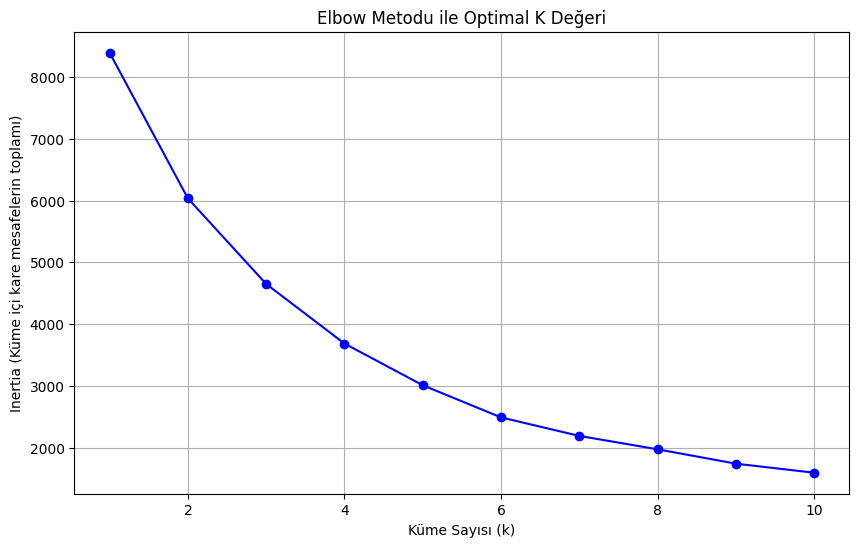


Seçilen optimal küme sayısı: 3

Küme Merkezleri:
           N           P           K  temperature   humidity        ph  \
0  24.139535   54.257475   31.671096    25.758215  45.927844  6.367735   
1  22.050251  133.341709  200.015075    23.245640  87.088388  5.976535   
2  89.459799   48.726131   40.087940    24.784374  78.327222  6.286084   

     rainfall  
0   88.209113  
1   90.965791  
2  119.368182  

Kümelerdeki nokta sayıları:
cluster
0    602
2    398
1    199
Name: count, dtype: int64


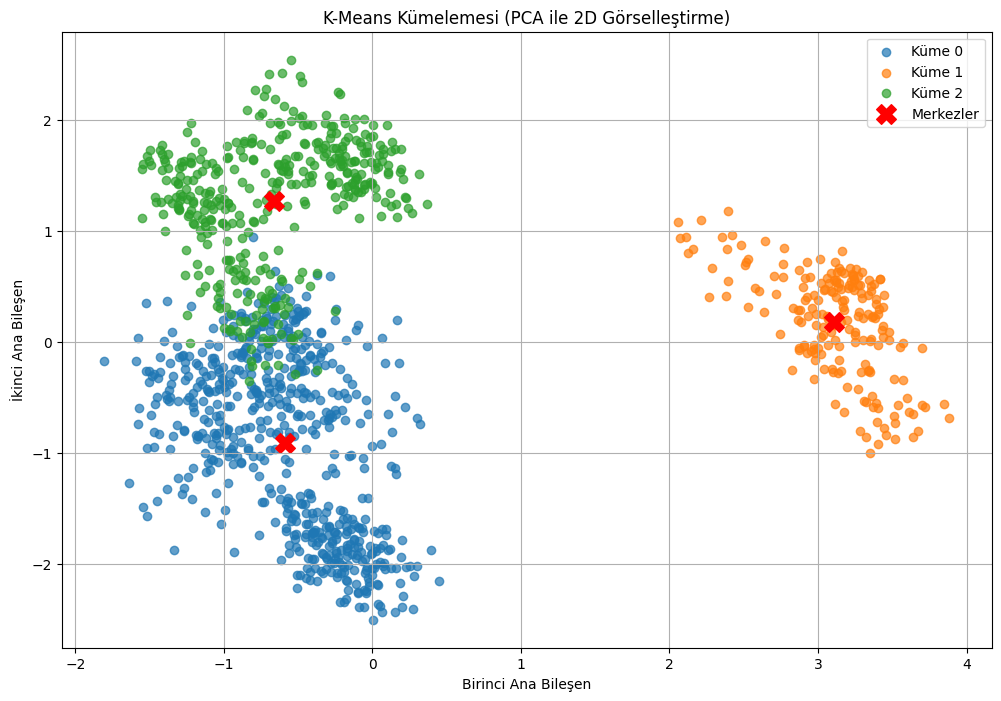


Kümelerin tanımlayıcı istatistikleri:

Küme 0 istatistikleri:
                N           P           K  temperature    humidity  \
count  602.000000  602.000000  602.000000   602.000000  602.000000   
mean    24.139535   54.257475   31.671096    25.758215   45.927844   
std     13.839842   16.833880   22.063170     5.473767   23.326859   
min      0.000000   15.000000   15.000000    15.330426   14.258040   
25%     13.000000   41.000000   19.000000    20.112139   21.377906   
50%     24.000000   57.000000   23.000000    27.450912   47.571024   
75%     34.000000   68.000000   30.000000    29.718502   58.256505   
max     63.000000   80.000000   85.000000    36.977944   89.996156   

               ph    rainfall  
count  602.000000  602.000000  
mean     6.367735   88.209113  
std      1.131976   39.131371  
min      3.504752   30.920140  
25%      5.656609   57.200953  
50%      6.283257   85.664152  
75%      6.989002  100.652850  
max      9.935091  198.829881  

Küme 1 istatistik

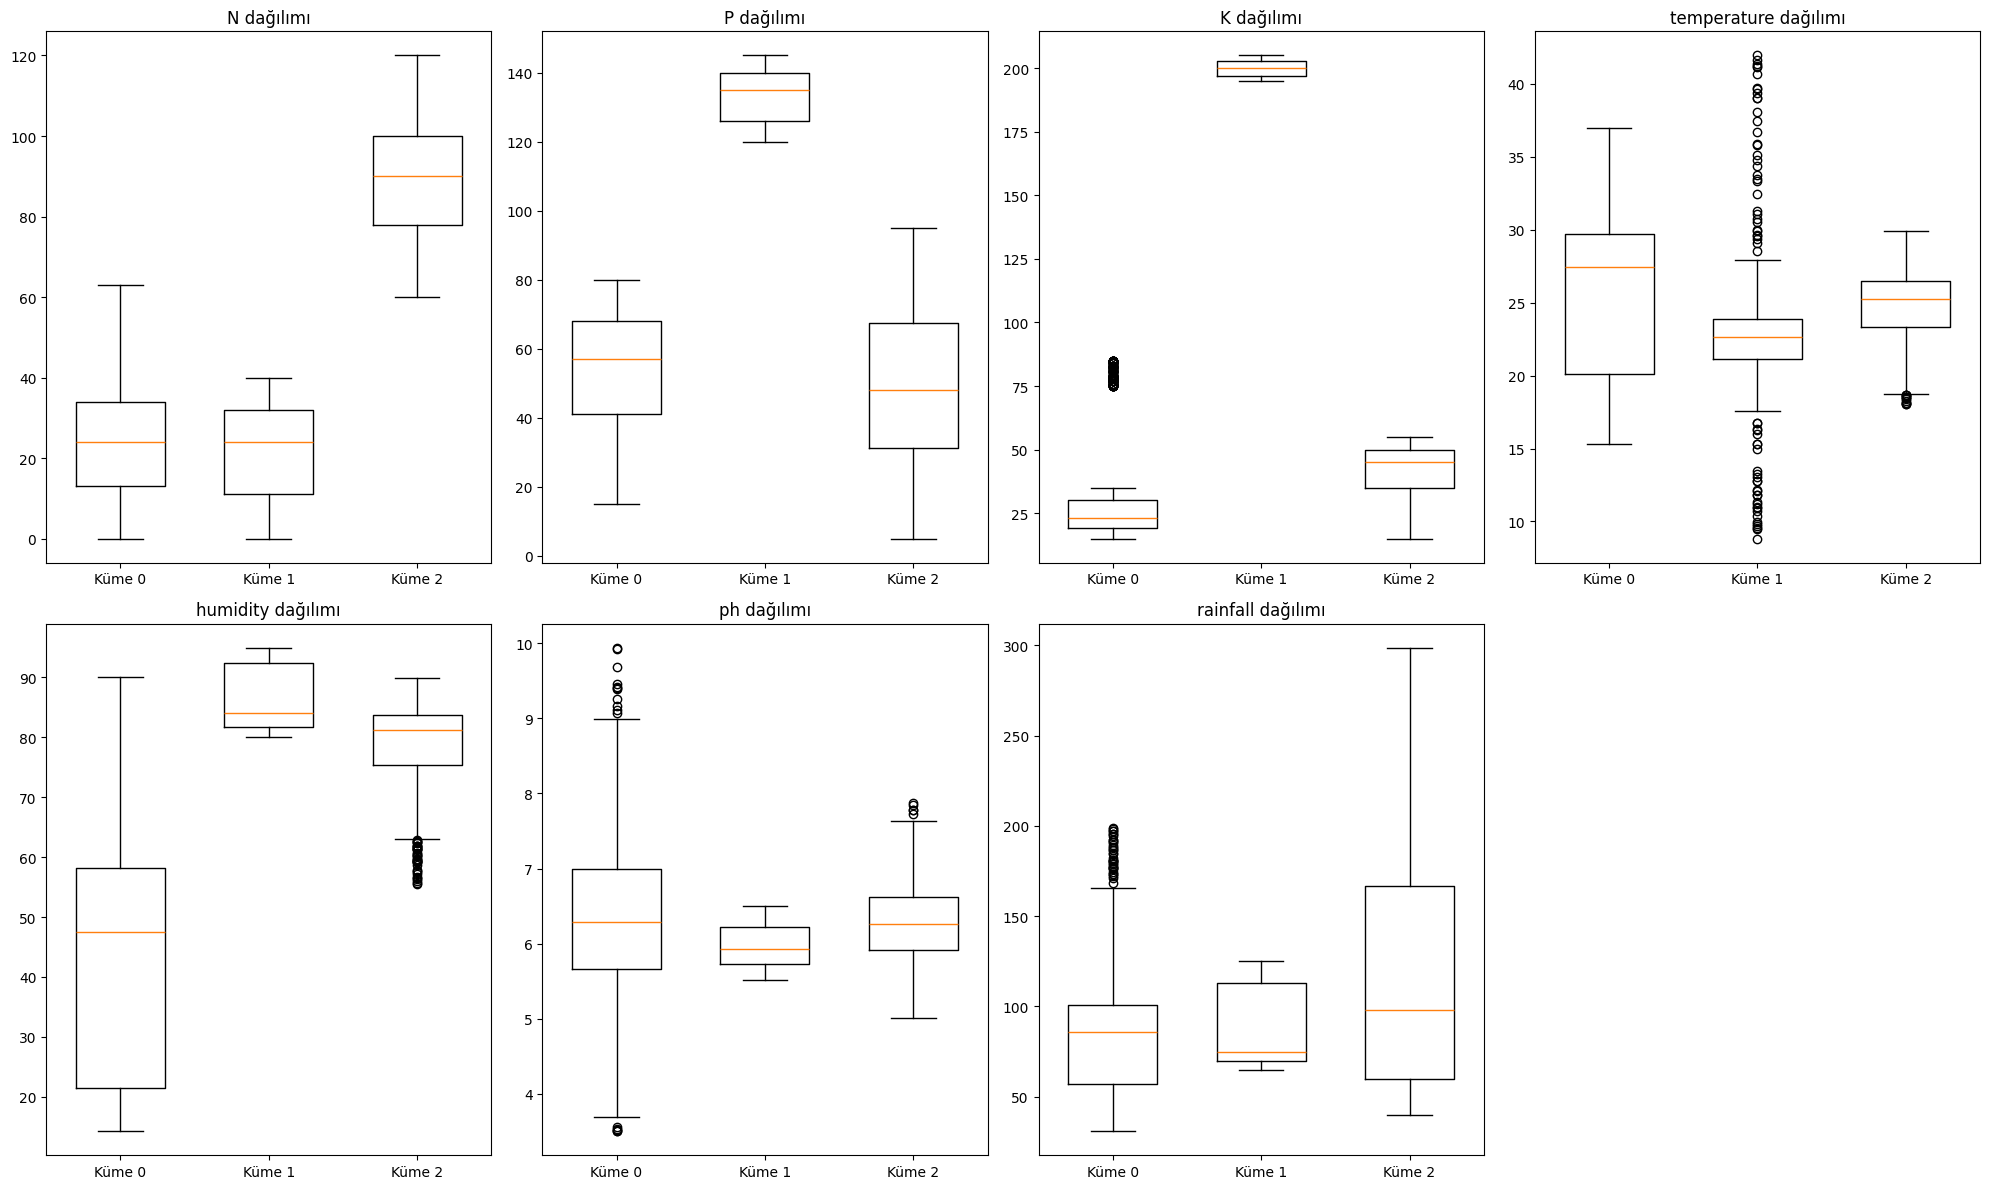

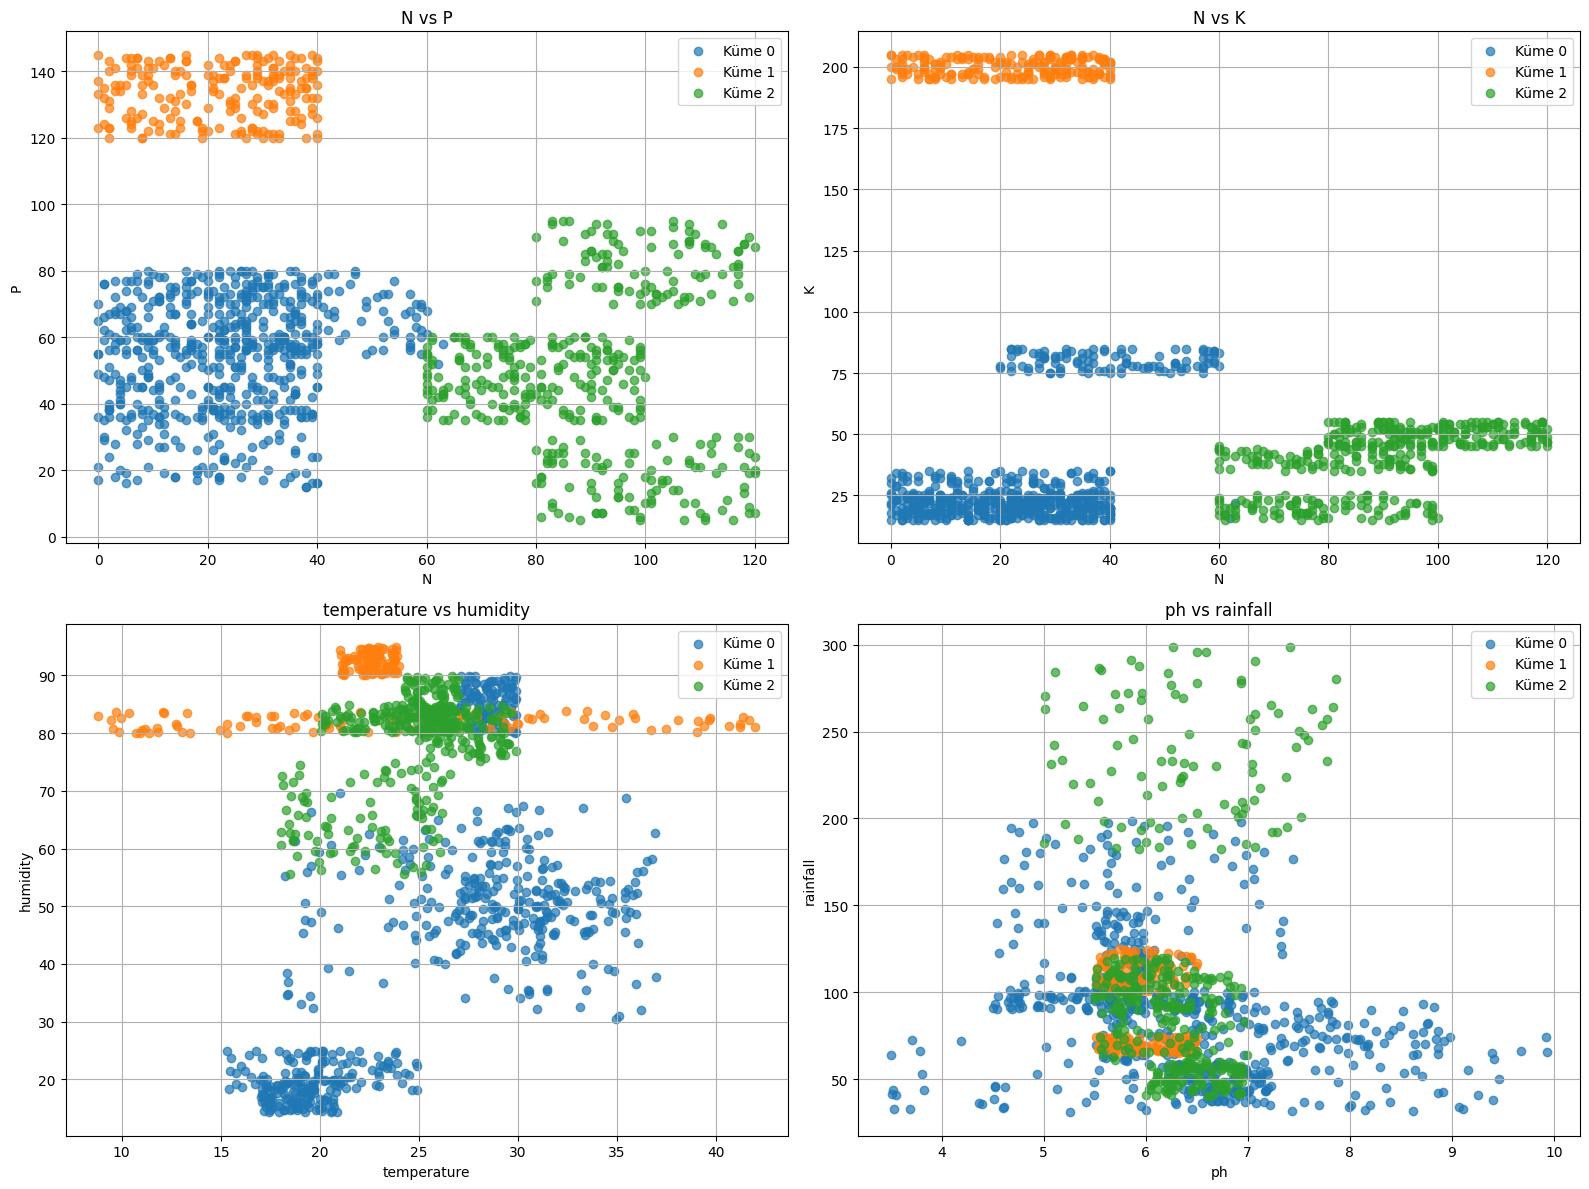


K-Means kümeleme analizi tamamlandı.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükle
df = pd.read_csv('crop.csv')

# Veri setine bakalım
print("Veri seti boyutu:", df.shape)
print(df.head())

# Etiketi kontrol edelim
print("\nEtiket dağılımı:")
print(df['label'].value_counts())

# Öznitelikleri ve etiketi ayıralım
X = df.drop('label', axis=1).values
y = df['label'].values

# Verileri ölçeklendirelim (K-means için önemli)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kümeleme için uygun k değerini bulmak için Elbow yöntemi
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.title('Elbow Metodu ile Optimal K Değeri')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Küme içi kare mesafelerin toplamı)')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

# K değerini seçelim (grafik incelemesine göre)
optimal_k = 3  # Elbow metoduna göre belirlenen değer
print(f"\nSeçilen optimal küme sayısı: {optimal_k}")

# K-means algoritmasını uygulayalım
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Sonuçları orijinal veri çerçevesine ekleyelim
df['cluster'] = cluster_labels

# Küme merkezlerini öznitelik alanına geri dönüştürelim
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-2])

# Küme merkezlerini görelim
print("\nKüme Merkezleri:")
print(centers_df)

# Her kümedeki nokta sayısını görelim
print("\nKümelerdeki nokta sayıları:")
print(df['cluster'].value_counts())

# Veriyi görselleştirmek için PCA uygulayalım (2 boyuta indirgeme)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA ile indirgenmiş verileri kümelere göre görselleştirelim
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                label=f'Küme {i}', alpha=0.7)

# Küme merkezlerini PCA uzayında gösterelim
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, marker='X', c='red', label='Merkezler')

plt.title('K-Means Kümelemesi (PCA ile 2D Görselleştirme)')
plt.xlabel('Birinci Ana Bileşen')
plt.ylabel('İkinci Ana Bileşen')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_pca.png')
plt.show()

# Her küme için tanımlayıcı istatistikler
print("\nKümelerin tanımlayıcı istatistikleri:")
for i in range(optimal_k):
    print(f"\nKüme {i} istatistikleri:")
    print(df[df['cluster'] == i].drop(['label', 'cluster'], axis=1).describe())

# Özniteliklerin kümelere göre dağılımını görselleştirelim
# Önemli öznitelikleri seçelim
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Her özniteliğin kümelere göre dağılımını gösteren kutu grafiği
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    for j in range(optimal_k):
        data = df[df['cluster'] == j][feature]
        plt.boxplot(data, positions=[j], widths=0.6)
    plt.title(f'{feature} dağılımı')
    plt.xticks(range(optimal_k), [f'Küme {i}' for i in range(optimal_k)])
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

# İkili öznitelik çiftlerinin görselleştirilmesi
feature_pairs = [('N', 'P'), ('N', 'K'), ('temperature', 'humidity'), ('ph', 'rainfall')]

plt.figure(figsize=(16, 12))
for i, (f1, f2) in enumerate(feature_pairs):
    plt.subplot(2, 2, i+1)
    for j in range(optimal_k):
        plt.scatter(df[df['cluster'] == j][f1], df[df['cluster'] == j][f2],
                   label=f'Küme {j}', alpha=0.7)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs {f2}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('feature_pairs.png')
plt.show()

print("\nK-Means kümeleme analizi tamamlandı.")
